In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("traffic_accident.csv")
data.head()

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               840 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        840 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [4]:
#Check the null values
data.isnull().sum()

Weather                 42
Road_Type               42
Time_of_Day             42
Traffic_Density         42
Speed_Limit             42
Number_of_Vehicles      42
Driver_Alcohol          42
Accident_Severity       42
Road_Condition          42
Vehicle_Type            42
Driver_Age              42
Driver_Experience       42
Road_Light_Condition    42
Accident                42
dtype: int64

In [10]:
#Handle the null values
data['Weather'] = data['Weather'].fillna("Unknown")
data['Road_Type'] = data['Road_Type'].fillna("Unknown")
data['Time_of_Day'] = data['Time_of_Day'].fillna("Unknown")
data['Traffic_Density'].fillna(data['Traffic_Density'].median(), inplace=True)
data['Speed_Limit'].fillna(data['Speed_Limit'].median(), inplace=True)
data['Number_of_Vehicles'].fillna(data['Number_of_Vehicles'].median(), inplace=True)
data['Driver_Alcohol'].fillna(data['Driver_Alcohol'].median(), inplace=True)
data['Accident_Severity'] = data['Accident_Severity'].fillna("Unknown")
data['Road_Condition'] = data['Road_Condition'].fillna("Unknown")
data['Vehicle_Type'] = data['Vehicle_Type'].fillna("Unknown")
data['Driver_Age'].fillna(data['Driver_Age'].median(), inplace=True)
data['Driver_Experience'].fillna(data['Driver_Experience'].median(), inplace=True)
data['Road_Light_Condition'] = data['Road_Light_Condition'].fillna("Unknown")
data['Accident'].fillna(data['Accident'].median(), inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15576\2092468812.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Traffic_Density'].fillna(data['Traffic_Density'].median(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_15576\2092468812.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

In [11]:
#Check the null values
data.isnull().sum()

Weather                 0
Road_Type               0
Time_of_Day             0
Traffic_Density         0
Speed_Limit             0
Number_of_Vehicles      0
Driver_Alcohol          0
Accident_Severity       0
Road_Condition          0
Vehicle_Type            0
Driver_Age              0
Driver_Experience       0
Road_Light_Condition    0
Accident                0
dtype: int64

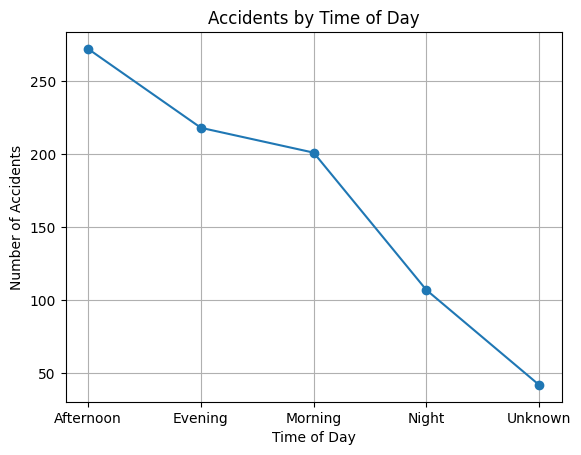

In [25]:
#Line Chart – Accidents by Time of Day
time_counts = data['Time_of_Day'].value_counts()

plt.figure()
plt.plot(time_counts.index, time_counts.values, marker='o')
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.grid(True)
plt.show()

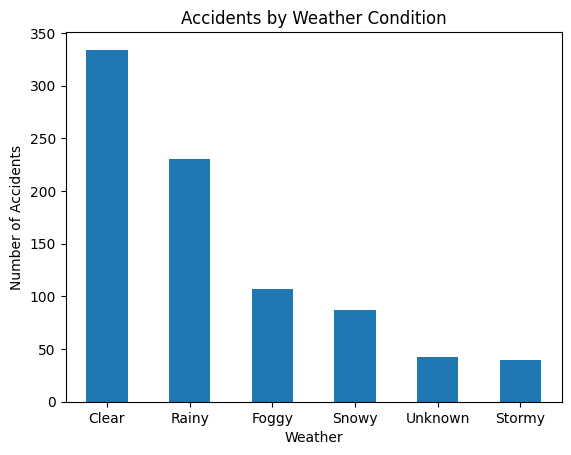

In [24]:
#Bar Chart – Weather Conditions
plt.figure()
data['Weather'].value_counts().plot(kind='bar')
plt.title("Accidents by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

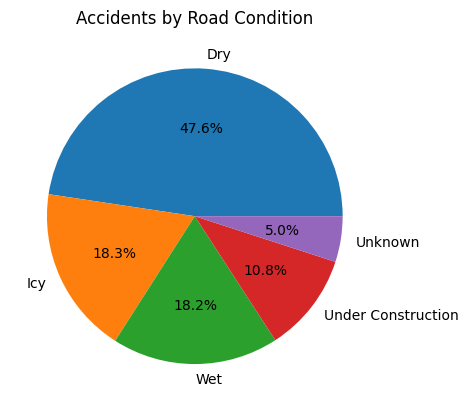

In [ ]:
#Pie Chart – Road Condition
plt.figure()
data['Road_Condition'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Accidents by Road Condition")
plt.ylabel("")
plt.show()

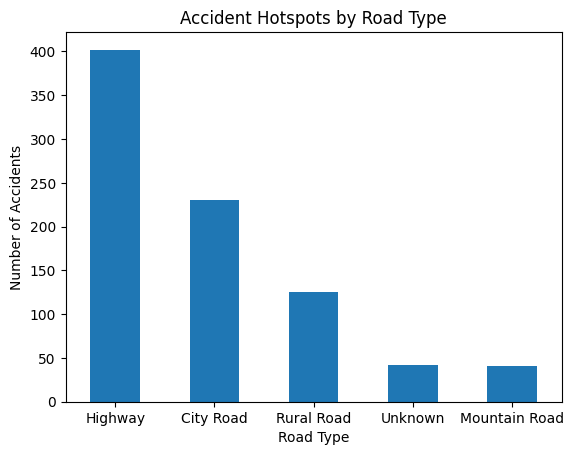

In [30]:
#Bar Chart – Top Accident Locations
road_hotspots = data['Road_Type'].value_counts().head(10)

plt.figure()
road_hotspots.plot(kind='bar')
plt.title("Accident Hotspots by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Vehicle_Type', ylabel='Accident'>

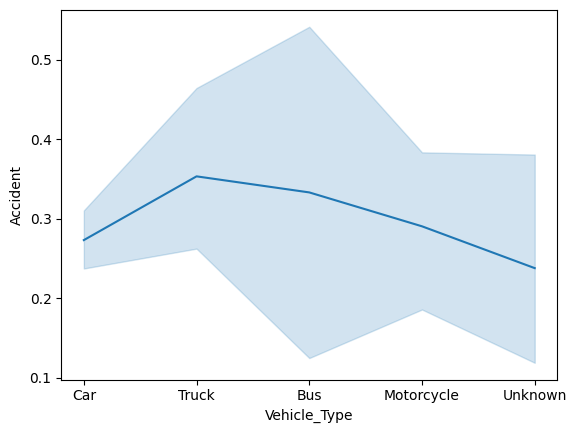

In [56]:
sns.lineplot(x='Vehicle_Type', y='Accident', data=data)